In [1]:
#mounting drive to google colab
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [33]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [34]:
#import dataset
path = '/content/drive/MyDrive/Colab Notebooks/wifi.csv'
df = pd.read_csv(path)

In [35]:
df.columns

Index(['Wifi 1', 'Wifi 2', 'Wifi 3', 'Wifi 4', 'Wifi 5', 'Wifi 6', 'Wifi 7',
       'Room'],
      dtype='object')

In [36]:
# one hot encoding
df1 = pd.get_dummies(df['Room'])
pd.concat([df['Room'], df1], axis=1)
df1

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1995,0,0,0,1
1996,0,0,0,1
1997,0,0,0,1
1998,0,0,0,1


In [37]:
X = df.drop(['Room'],axis=1)
Y = df1

In [38]:
X_train, X_test,Y_train, Y_test = train_test_split (X, Y, test_size=0.20,random_state=0)
print("X_trainshape",X_train.shape)
print("Y_trainshape",Y_train.shape)
print("X_testshape",X_test.shape)
print("Y_testshape",Y_test.shape)

X_trainshape (1600, 7)
Y_trainshape (1600, 4)
X_testshape (400, 7)
Y_testshape (400, 4)


In [45]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from keras.models import Sequential
from keras.layers import Dense
#Regularizaton
from keras.models import Sequential
from keras import initializers
from keras import regularizers

In [55]:
# buliding the sequential model
#number of neurons
L1=100
L2=100
L3=100

#dim = 7 because we have 7 fields
#activation = relu means to use relu model
model = Sequential()
model.add(Dense(L1,input_dim=7, activation='relu'))
model.add(Dense(L2,activation='relu'))
model.add(Dense(L3,activation='relu'))


#output layer
# softmax as thi si categorical, not binary
model.add(Dense(4,activation = 'softmax'))


In [53]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = 'Adam')
history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_data =(X_test, Y_test) )

Epoch 1/10
16/16 [==============================] - 1s 18ms/step - loss: 1.0360 - accuracy: 0.7225 - val_loss: 0.6878 - val_accuracy: 0.8225
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.4419 - accuracy: 0.8950 - val_loss: 0.2748 - val_accuracy: 0.9350
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.1761 - accuracy: 0.9656 - val_loss: 0.1430 - val_accuracy: 0.9575
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.1037 - accuracy: 0.9712 - val_loss: 0.1080 - val_accuracy: 0.9575
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0826 - accuracy: 0.9725 - val_loss: 0.0960 - val_accuracy: 0.9700
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 0.0702 - accuracy: 0.9769 - val_loss: 0.0792 - val_accuracy: 0.9700
Epoch 7/10
16/16 [==============================] - 0s 6ms/step - loss: 0.0641 - accuracy: 0.9775 - val_loss: 0.0742 - val_accuracy: 0.9675
Epoch 8/10
16/16 [=

<Figure size 432x288 with 0 Axes>

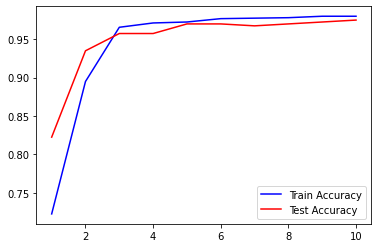

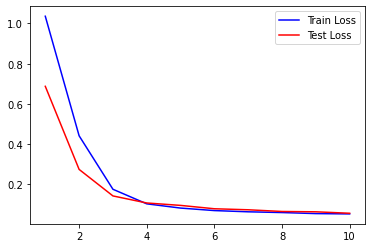

<Figure size 432x288 with 0 Axes>

In [54]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs =  range(1,len(acc2)+1)

plt.plot(epochs, acc2, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.figure()